In [1]:
#Imports and everything else, better to not modify this part
import numpy as np
import sys
import pandas as pd
#
import matplotlib.pyplot as plt

import matplotlib.ticker as ticker
# from collections import namedtuple

import seaborn as sns


try:
    # for Python2
    from Tkinter import *   ## notice capitalized T in Tkinter 
except ImportError:
    # for Python3
    from tkinter import *   ## notice lowercase 't' in tkinter here
    
    
    
    pd.set_option('display.max_rows', 100)


In [3]:
#Vanilla General
fileHandle = open('/home/flav/gossip/gossip_data/data/lotus/vanillaGeneral/log_stdout.out', "r", encoding="latin1")
lines = fileHandle.readlines()

with open('/home/flav/gossip/gossip_data/filter/vanillaGeneral_stdout.out', 'w+') as f:
    for line in lines:
      if 'Validation' in line:
        print(line, file=f)
fileHandle.close()

dataVanillaGeneral = pd.read_csv('/home/flav/gossip/gossip_data/filter/vanillaGeneral_stdout.out', sep="|", header=None, error_bad_lines=False, warn_bad_lines=False)#, usecols=[0,2,5])
dfVanillaGeneral = pd.DataFrame(dataVanillaGeneral)

#Rename
dfVanillaGeneral = dfVanillaGeneral.rename(index=str, columns={0: "DateTime", 1: "Type", 2: "Hash"})
dfVanillaGeneral["Type"] = dfVanillaGeneral["Type"].str.replace(" ", "")
dfVanillaGeneral["DateTime"] = dfVanillaGeneral["DateTime"].str.replace(".", "")
dfVanillaGeneral["DateTime"] = dfVanillaGeneral["DateTime"].str.replace("-", "")
dfVanillaGeneral["DateTime"] = dfVanillaGeneral["DateTime"].str.replace(":", "")
dfVanillaGeneral["DateTime"] = dfVanillaGeneral["DateTime"].str.replace(" ", "")
dfVanillaGeneral['DateTime'] = pd.to_datetime(dfVanillaGeneral['DateTime'], format="%Y%m%d_%H%M%S%f", errors="coerce").dropna()

# dfVanillaGeneral=dfVanillaGeneral.loc[dfVanillaGeneral['Type'] == 'ValidationUnique']
dfVanillaGeneral=dfVanillaGeneral.sort_values(by=['DateTime']).drop(columns=['Type']).dropna()

dfVanillaGeneral.head(10)

,DateTime,Hash
0,2022-06-09 18:14:22.043,D9A280AF8383C1B49DD63CA97A82EE7431ADC77710F9F...
1,2022-06-09 18:14:22.046,D9A280AF8383C1B49DD63CA97A82EE7431ADC77710F9F...
2,2022-06-09 18:14:22.046,D9A280AF8383C1B49DD63CA97A82EE7431ADC77710F9F...
3,2022-06-09 18:14:22.050,D9A280AF8383C1B49DD63CA97A82EE7431ADC77710F9F...
4,2022-06-09 18:14:22.051,D9A280AF8383C1B49DD63CA97A82EE7431ADC77710F9F...
5,2022-06-09 18:14:22.051,D9A280AF8383C1B49DD63CA97A82EE7431ADC77710F9F...
6,2022-06-09 18:14:22.052,D9A280AF8383C1B49DD63CA97A82EE7431ADC77710F9F...
7,2022-06-09 18:14:22.052,D9A280AF8383C1B49DD63CA97A82EE7431ADC77710F9F...
8,2022-06-09 18:14:22.053,D9A280AF8383C1B49DD63CA97A82EE7431ADC77710F9F...
9,2022-06-09 18:14:22.053,D9A280AF8383C1B49DD63CA97A82EE7431ADC77710F9F...


In [4]:
#Vanilla Validator
fileHandle = open('/home/flav/gossip/gossip_data/data/lotus/vanillaValidator/log_stdout.out', "r", encoding="latin1")
lines = fileHandle.readlines()

with open('/home/flav/gossip/gossip_data/filter/vanillaValidator_stdout.out', 'w+') as f:
    for line in lines:
      if 'Validation' in line:
        print(line, file=f)
fileHandle.close()

dataVanillaValidator = pd.read_csv('/home/flav/gossip/gossip_data/filter/vanillaValidator_stdout.out', sep="|", header=None, error_bad_lines=False, warn_bad_lines=False)#, usecols=[0,2,5])
dfVanillaValidator = pd.DataFrame(dataVanillaValidator)

#Rename
dfVanillaValidator = dfVanillaValidator.rename(index=str, columns={0: "DateTime", 1: "Type", 2: "Hash"})
dfVanillaValidator["Type"] = dfVanillaValidator["Type"].str.replace(" ", "")
dfVanillaValidator["DateTime"] = dfVanillaValidator["DateTime"].str.replace(".", "")
dfVanillaValidator["DateTime"] = dfVanillaValidator["DateTime"].str.replace("-", "")
dfVanillaValidator["DateTime"] = dfVanillaValidator["DateTime"].str.replace(":", "")
dfVanillaValidator["DateTime"] = dfVanillaValidator["DateTime"].str.replace(" ", "")
dfVanillaValidator['DateTime'] = pd.to_datetime(dfVanillaValidator['DateTime'], format="%Y%m%d_%H%M%S%f", errors="coerce").dropna()

# dfVanillaValidator=dfVanillaValidator.loc[dfVanillaValidator['Type'] == 'ValidationUnique']
dfVanillaValidator=dfVanillaValidator.sort_values(by=['DateTime']).drop(columns=['Type']).dropna()

dfVanillaValidator.head(10)

,DateTime,Hash
0,2022-06-12 16:10:32.144,8AF21DD063C68976FC7FC32A7B1F77EEEA76E75B7856D...
1,2022-06-12 16:10:32.144,8AF21DD063C68976FC7FC32A7B1F77EEEA76E75B7856D...
2,2022-06-12 16:10:32.145,8AF21DD063C68976FC7FC32A7B1F77EEEA76E75B7856D...
3,2022-06-12 16:10:32.146,8AF21DD063C68976FC7FC32A7B1F77EEEA76E75B7856D...
4,2022-06-12 16:10:32.146,8AF21DD063C68976FC7FC32A7B1F77EEEA76E75B7856D...
5,2022-06-12 16:10:32.147,8AF21DD063C68976FC7FC32A7B1F77EEEA76E75B7856D...
6,2022-06-12 16:10:32.147,8AF21DD063C68976FC7FC32A7B1F77EEEA76E75B7856D...
7,2022-06-12 16:10:32.148,8AF21DD063C68976FC7FC32A7B1F77EEEA76E75B7856D...
8,2022-06-12 16:10:32.148,8AF21DD063C68976FC7FC32A7B1F77EEEA76E75B7856D...
10,2022-06-12 16:10:32.149,8AF21DD063C68976FC7FC32A7B1F77EEEA76E75B7856D...


In [10]:
#unl
fileHandle = open('/home/flav/gossip/gossip_data/data/lotus/unl/log_go.out', "r", encoding="latin1")
lines = fileHandle.readlines()

with open('/home/flav/gossip/gossip_data/filter/unl_go.out', 'w+') as f:
    for line in lines:
      if '| GossipSub | Recieved |' in line:
        print(line, file=f)
fileHandle.close()

dataUNL = pd.read_csv('/home/flav/gossip/gossip_data/filter/unl_go.out', sep="|", header=None, error_bad_lines=False, warn_bad_lines=False, usecols=[0,7])
dfUNL = pd.DataFrame(dataUNL)

# #Rename
dfUNL = dfUNL.rename(index=str, columns={0: "DateTime", 7: "Hash"})
dfUNL["DateTime"] = dfUNL["DateTime"].str.replace(".", "")
dfUNL["DateTime"] = dfUNL["DateTime"].str.replace("-", "")
dfUNL["DateTime"] = dfUNL["DateTime"].str.replace(":", "")
dfUNL["DateTime"] = dfUNL["DateTime"].str.replace(" ", "")
dfUNL['DateTime'] = pd.to_datetime(dfUNL['DateTime'], format="%Y/%m/%d%H%M%S%f", errors="coerce").dropna()
dfUNL=dfUNL.sort_values(by=['DateTime']).drop(columns=['Type']).dropna()

dfUNL.tail(10)

,DateTime,Hash
13837,2022/06/13 14:12:40,4cd13c5371fea666abb8aea4306cd2c7cd8e32f905c0...
13838,2022/06/13 14:12:40,a7d7fb65e8148fc7d125139795b04fe435835a022a1c...
13839,2022/06/13 14:12:40,0c6ea075329518ecca3b485755d382913303e5bd2abb...
13840,2022/06/13 14:12:40,b29242fadc2c6e5cf1ff25a5f09d85768dcb4138bcbf...
13841,2022/06/13 14:12:40,8fdae9c7cba0a26d7097fdc6b16eb5773b3e97c79e14...
13842,2022/06/13 14:12:40,891d3d449db90bd2682984cfe6a51af773a97f1821ce...
13843,2022/06/13 14:12:40,eea860ed1ab12bc900f9501b5b963bf2be9dc32f2dd8...
13844,2022/06/13 14:12:40,0fe4386844a4efd2b5b1b417d3c01d8781a3b57b7e4d...
13845,2022/06/13 14:12:40,e41ddfb090f31e324917ba6323b24d1a438aca221429...
13846,2022/06/13 14:12:41,66f1b277687d847de78260906af487fbb749a6491d2d...


In [59]:
#General
fileHandle = open('/home/flav/gossip/gossip_data/data/lotus/general/log_stdout.out', "r", encoding="latin1")
lines = fileHandle.readlines()

with open('/home/flav/gossip/gossip_data/filter/general_stdout.out', 'w+') as f:
    for line in lines:
      if 'Validation' in line:
        print(line, file=f)
fileHandle.close()

dataGeneral = pd.read_csv('/home/flav/gossip/gossip_data/filter/general_stdout.out', sep="|", header=None, error_bad_lines=False, warn_bad_lines=False)#, usecols=[0,2,5])
dfGeneral = pd.DataFrame(dataGeneral)

#Rename
dfGeneral = dfGeneral.rename(index=str, columns={0: "DateTime", 1: "Type", 2: "Hash"})
dfGeneral["Type"] = dfGeneral["Type"].str.replace(" ", "")
dfGeneral["DateTime"] = dfGeneral["DateTime"].str.replace(".", "")
dfGeneral["DateTime"] = dfGeneral["DateTime"].str.replace("-", "")
dfGeneral["DateTime"] = dfGeneral["DateTime"].str.replace(":", "")
dfGeneral["DateTime"] = dfGeneral["DateTime"].str.replace(" ", "")
dfGeneral['DateTime'] = pd.to_datetime(dfGeneral['DateTime'], format="%Y%m%d_%H%M%S%f", errors="coerce").dropna()
dfGeneral=dfGeneral.sort_values(by=['DateTime']).drop(columns=['Type']).dropna()

dfGeneral.head(10)

,DateTime,Hash
0,2022-06-09 21:57:40.349,4C0490B14646BDAE30490C70F16D453AB21E9808EF855...
1,2022-06-09 21:57:52.251,793812F0615B0BACD74A1782CA1223B35112633DE2623...
2,2022-06-09 21:57:52.310,8DEDFD4DFF9E9318FE1B173890D2CB0D01142BA663503...
3,2022-06-09 21:57:52.483,6F59122B49B1DA4D43B647F7BCCE6B6B5FE6D26EEE78E...
4,2022-06-09 21:57:52.901,FB45DA0472F60AF69D0529E8D9930832756B579ED4735...
5,2022-06-09 21:57:53.000,BD8FFF0AE101813324387B6ABB871C548579CCE32938B...
6,2022-06-09 21:57:53.038,87B4C37CA8341A184B60B1B915FD481B6CD15C59222E2...
7,2022-06-09 21:58:12.052,4A2CA42ABEC225DF73962661D7A87DF030EE72B0EA03A...
8,2022-06-09 21:58:12.061,092425B0F9C0F5D7EFD8872C502F72C036F53002F7D44...
9,2022-06-09 21:58:12.116,B7D46F4752EE130515E0F1D99F86188B798DC016557D9...


In [60]:
#Average delta between two messages
dfVanillaGeneral['delta']=dfVanillaGeneral["DateTime"].diff().fillna(pd.Timedelta(milliseconds=0)).astype('timedelta64').astype('Int64').dropna()
dfVanillaGeneral['type'] = "vanilla"


dfVanillaGeneral.tail(10)

,DateTime,Hash,delta,type
552437,2022-06-09 19:18:11.753,FA321E48C6092218C34362AA2750C9AC7DD92E4D0A4A1...,148000000,vanilla
552449,2022-06-09 19:18:11.775,F2EA0BD84835B7285831E989AB95FCAF6EB00A268B57F...,22000000,vanilla
552467,2022-06-09 19:18:11.798,EA8B24C6ED042D9645169E2AEF001CF90541D4BB1B50E...,23000000,vanilla
552487,2022-06-09 19:18:11.867,C59AB3C69DE882B7BD41EE9E53154A3109E91282776DA...,69000000,vanilla
552500,2022-06-09 19:18:11.891,AEF1BDDBCA54CD7E564F8F73B79C1692382C7D2550F7C...,24000000,vanilla
552522,2022-06-09 19:18:11.933,3A52781F71F3D6E334C35A91C0BCED412BE477899EFD7...,42000000,vanilla
552545,2022-06-09 19:18:11.962,F5B86F1DBE95F465CFAADF9915101C889915B85B86E7E...,29000000,vanilla
552567,2022-06-09 19:18:12.012,CFF38F226B250D659026B53E3B6D3A1119587B16FB1F9...,50000000,vanilla
552589,2022-06-09 19:18:12.130,8C877FE741C87CFA1BA26725E91AE8E46FAC35BBF0016...,118000000,vanilla
552606,2022-06-09 19:18:12.148,BA6FBE7EE5FE11BE8506E957D9A1842202DF90A23431E...,18000000,vanilla


In [61]:
#Average delta between two messages
dfVanillaValidator['delta']=dfVanillaValidator["DateTime"].diff().fillna(pd.Timedelta(milliseconds=0)).astype('timedelta64').astype('Int64').dropna()
dfVanillaValidator['type'] = "vanilla"


dfVanillaValidator.tail(10)

,DateTime,Hash,delta,type
387402,2022-06-12 17:12:36.836,441E53A2FC22C1C481E26F4E44E120D9FE558120CADF6...,14000000,vanilla
387430,2022-06-12 17:12:36.910,1003DB0F7E62FBBD67487F69732A34C6B4FEA0FB743AD...,74000000,vanilla
387442,2022-06-12 17:12:36.953,35E95A143E60EC29B95E03E4F53968824B42AD96B23D2...,43000000,vanilla
387459,2022-06-12 17:12:36.972,07B95287BEFCB8F71B89F147891D9335B5D4617F747AD...,19000000,vanilla
387470,2022-06-12 17:12:36.993,8BA7DF06D831E135C4FB076DC2F191129909ED74ADF65...,21000000,vanilla
387483,2022-06-12 17:12:37.063,9F26EBDD518DABAEA8F26A722CDE4080462E49ABD61D2...,70000000,vanilla
387500,2022-06-12 17:12:37.127,428DDD4BAB71B5DAE3887C7A00B8CB158110F83F17343...,64000000,vanilla
387518,2022-06-12 17:12:37.173,AE80F95283751B33EFD7658538D586331DF6F77C50435...,46000000,vanilla
387526,2022-06-12 17:12:37.389,E7DF929F7EBF59382E862803652F7AB24D8D11FEB26F5...,216000000,vanilla
387544,2022-06-12 17:12:37.413,FAD11AF095E93D7D58947998513085B2A5D0A770D63E9...,24000000,vanilla


In [62]:
dfValidator['delta']=dfValidator["DateTime"].diff().fillna(pd.Timedelta(milliseconds=0)).astype('timedelta64').astype('Int64').dropna()
dfValidator['type'] = "validator"
dfValidator.head(10)

,DateTime,Hash,delta,type
0,2022-06-10 13:41:30.130,BEADCF2416B8D57924069AEC15A68AD2EFD77BA609406...,0,validator
1,2022-06-10 13:41:30.583,410CBD49EF141B7EB3E0BB0E604D6009B74E1F495FE97...,453000000,validator
2,2022-06-10 13:41:31.645,08FADA5FBB003C294CBBFE11415688DF8FBAE197BB6DE...,1062000000,validator
3,2022-06-10 13:41:31.649,2CF3A5037C439050955722FA75F63D3DA36072BFAB1B0...,4000000,validator
4,2022-06-10 13:41:31.746,706C06BF67DC506E41EEAB196D2217274D2132A2DAFD3...,97000000,validator
5,2022-06-10 13:41:31.747,6A8DF7369E061D3EEA7DF9D80E1E1E0CDA8119E0A9A65...,1000000,validator
6,2022-06-10 13:41:31.751,9A65805197D2CEA1300D906A569723AD37DEA7E42E6C3...,4000000,validator
7,2022-06-10 13:41:31.753,8298B191C066883620C15084433D2CBF46F66D3184B1A...,2000000,validator
8,2022-06-10 13:41:35.190,D4C891173744B7D276025EE93FC92490B29E0651D45EC...,3437000000,validator
9,2022-06-10 13:41:35.398,07BC3BAE28C795D93BA200FF4A2F9A0D5EF02ABFAB756...,208000000,validator


In [63]:
dfGeneral['delta']=dfGeneral["DateTime"].diff().fillna(pd.Timedelta(milliseconds=0)).astype('timedelta64').astype('Int64').dropna()
dfGeneral['type'] = "general"
dfGeneral.head(10)

,DateTime,Hash,delta,type
0,2022-06-09 21:57:40.349,4C0490B14646BDAE30490C70F16D453AB21E9808EF855...,0,general
1,2022-06-09 21:57:52.251,793812F0615B0BACD74A1782CA1223B35112633DE2623...,11902000000,general
2,2022-06-09 21:57:52.310,8DEDFD4DFF9E9318FE1B173890D2CB0D01142BA663503...,59000000,general
3,2022-06-09 21:57:52.483,6F59122B49B1DA4D43B647F7BCCE6B6B5FE6D26EEE78E...,173000000,general
4,2022-06-09 21:57:52.901,FB45DA0472F60AF69D0529E8D9930832756B579ED4735...,418000000,general
5,2022-06-09 21:57:53.000,BD8FFF0AE101813324387B6ABB871C548579CCE32938B...,99000000,general
6,2022-06-09 21:57:53.038,87B4C37CA8341A184B60B1B915FD481B6CD15C59222E2...,38000000,general
7,2022-06-09 21:58:12.052,4A2CA42ABEC225DF73962661D7A87DF030EE72B0EA03A...,19014000000,general
8,2022-06-09 21:58:12.061,092425B0F9C0F5D7EFD8872C502F72C036F53002F7D44...,9000000,general
9,2022-06-09 21:58:12.116,B7D46F4752EE130515E0F1D99F86188B798DC016557D9...,55000000,general


In [64]:
dfUNL['delta']=dfUNL["DateTime"].diff().fillna(pd.Timedelta(milliseconds=0)).astype('timedelta64').astype('Int64').dropna()
dfUNL['type'] = "general"
dfUNL.tail(10)

,DateTime,Hash,delta,type
13837,2022-06-13 14:12:40.320,18A48839F33689382A287CEA83CBEBD52B92F59CA65D4...,1983000000,general
13838,2022-06-13 14:12:40.351,C1A81B93515CAECDAC26491F5EAA0D541328845B16C39...,31000000,general
13839,2022-06-13 14:12:40.370,29C570C85F58552483AB3475D88DCFD363377339B66F8...,19000000,general
13840,2022-06-13 14:12:40.407,FECE9B1CCE68C6AF7391D8097E308D131AF1C719191E3...,37000000,general
13841,2022-06-13 14:12:40.434,3FF27CB870DD023BA5FD21A8D5B60B870F0AE183FAEBA...,27000000,general
13842,2022-06-13 14:12:40.448,694165D0FB2464C57D16D3912C37C21AEB454488E5EE5...,14000000,general
13843,2022-06-13 14:12:40.734,CB1B17C5AC8EF3B1465842FDBF6A2FE567310C85D780D...,286000000,general
13844,2022-06-13 14:12:40.857,1E0BB426BFE7733EF80A008600443E8475D18EAF960F9...,123000000,general
13845,2022-06-13 14:12:40.877,2558FB44B49F0203991418169C451B2906AD76B506C03...,20000000,general
13846,2022-06-13 14:12:41.345,3AE9C8BC6BF39998484957E40C8191BC20D6D8739A720...,468000000,general


In [65]:
#Generate fist naive graph
#Time since the begning

plotVanillaGeneral=dfVanillaGeneral.drop(columns=['Hash', 'type'])
plotVanillaGeneral['beg']=dfVanillaGeneral['DateTime'].iloc[0]
plotVanillaGeneral['time']=(plotVanillaGeneral['DateTime'] - plotVanillaGeneral['beg']).dt.total_seconds()
plotVanillaGeneral=plotVanillaGeneral.drop(columns=['DateTime', 'beg']).dropna()
plotVanillaGeneral['type']='vanilla'
plotVanillaGeneral=plotVanillaGeneral.loc[plotVanillaGeneral['time'] >= 1500.0]
plotVanillaGeneral=plotVanillaGeneral.loc[plotVanillaGeneral['time'] <= 3300.0]

plotVanillaValidator=dfVanillaValidator.drop(columns=['Hash', 'type'])
plotVanillaValidator['beg']=dfVanillaValidator['DateTime'].iloc[0]
plotVanillaValidator['time']=(plotVanillaValidator['DateTime'] - plotVanillaValidator['beg']).dt.total_seconds()
plotVanillaValidator=plotVanillaValidator.drop(columns=['DateTime', 'beg']).dropna()
plotVanillaValidator['type']='vanilla'
plotVanillaValidator=plotVanillaValidator.loc[plotVanillaValidator['time'] >= 1500.0]
plotVanillaValidator=plotVanillaValidator.loc[plotVanillaValidator['time'] <= 3300.0]

plotGeneral=dfGeneral.drop(columns=['Hash', 'type'])
plotGeneral['beg']=dfGeneral['DateTime'].iloc[0]
plotGeneral['time']=(plotGeneral['DateTime'] - plotGeneral['beg']).dt.total_seconds()
plotGeneral=plotGeneral.drop(columns=['DateTime', 'beg']).dropna()
plotGeneral['type']='general'
plotGeneral=plotGeneral.loc[plotGeneral['time'] >= 1500.0]
plotGeneral=plotGeneral.loc[plotGeneral['time'] <= 3300.0]

plotValidator=dfValidator.drop(columns=['Hash', 'type'])
plotValidator['beg']=dfValidator['DateTime'].iloc[0]
plotValidator['time']=(plotValidator['DateTime'] - plotValidator['beg']).dt.total_seconds()
plotValidator=plotValidator.drop(columns=['DateTime', 'beg']).dropna()
plotValidator['type']='validator'
plotValidator=plotValidator.loc[plotValidator['time'] >= 1500.0]
plotValidator=plotValidator.loc[plotValidator['time'] <= 3300.0]

plotUNL=dfUNL.drop(columns=['Hash', 'type'])
plotUNL['beg']=dfUNL['DateTime'].iloc[0]
plotUNL['time']=(plotUNL['DateTime'] - plotUNL['beg']).dt.total_seconds()
plotUNL=plotUNL.drop(columns=['DateTime', 'beg']).dropna()
plotUNL['type']='unl'
plotUNL=plotUNL.loc[plotUNL['time'] >= 1500.0]
plotUNL=plotUNL.loc[plotUNL['time'] <= 3300.0]

plotTime=plotVanillaGeneral.append([plotUNL,plotGeneral,plotValidator, plotVanillaValidator])

plotUNL.tail(10)
# to_csv('/home/flav/gossip/gossip_data/time.csv')

,delta,time,type
11528,110000000,3297.093,unl
11529,37000000,3297.130,unl
11530,18000000,3297.148,unl
11531,50000000,3297.198,unl
11532,17000000,3297.215,unl
11533,18000000,3297.233,unl
11534,150000000,3297.383,unl
11535,214000000,3297.597,unl
11536,32000000,3297.629,unl
11537,2358000000,3299.987,unl


In [66]:
#Average
avgVanillaGeneral=plotVanillaGeneral['delta'].mean()
avgVanillaValidator=plotVanillaValidator['delta'].mean()
avgGeneral=plotGeneral['delta'].mean()
avgValidator=plotValidator['delta'].mean()
avgUNL=plotUNL['delta'].mean()

#Total Number of messages
messVanillaGeneral=dfVanillaGeneral['Hash'].count()
messVanillaValidator=dfVanillaValidator['Hash'].count()
messGeneral=dfGeneral['Hash'].count()
messValidator=dfValidator['Hash'].count()
messUNL=dfUNL['Hash'].count()

#Total Time ran
timeVanillaGeneral=plotVanillaGeneral['time'].max()
timeVanillaValidator=plotVanillaValidator['time'].max()
timeGeneral=plotGeneral['time'].max()
timeValidator=plotValidator['time'].max()
timeUNL=plotUNL['time'].max()


dataAvgDelta=[['VanillaFully', avgVanillaGeneral, messVanillaGeneral, timeVanillaGeneral], ['general', avgGeneral, messGeneral, timeGeneral], ['Vanilla16', avgVanillaValidator, messVanillaValidator, timeVanillaValidator], ['validator', avgValidator, messValidator, timeValidator], ['unl', avgUNL, messUNL, timeUNL]]
avgDelta = pd.DataFrame(dataAvgDelta, columns=['type', 'avg', 'messages', 'time'])

avgDelta['rate'] = avgDelta['avg']/avgDelta['time'] 

avgDelta.head(5)

,type,avg,messages,time,rate
0,VanillaFully,1.319623e+08,28875,3299.127,39999.169115
1,Vanilla16,1.321396e+08,28057,3299.690,40046.079352
2,general,1.317620e+08,28195,3298.933,39940.805314
3,validator,1.708058e+08,29443,3298.735,51779.185480
4,unl,3.037205e+08,13847,3299.987,92036.863134


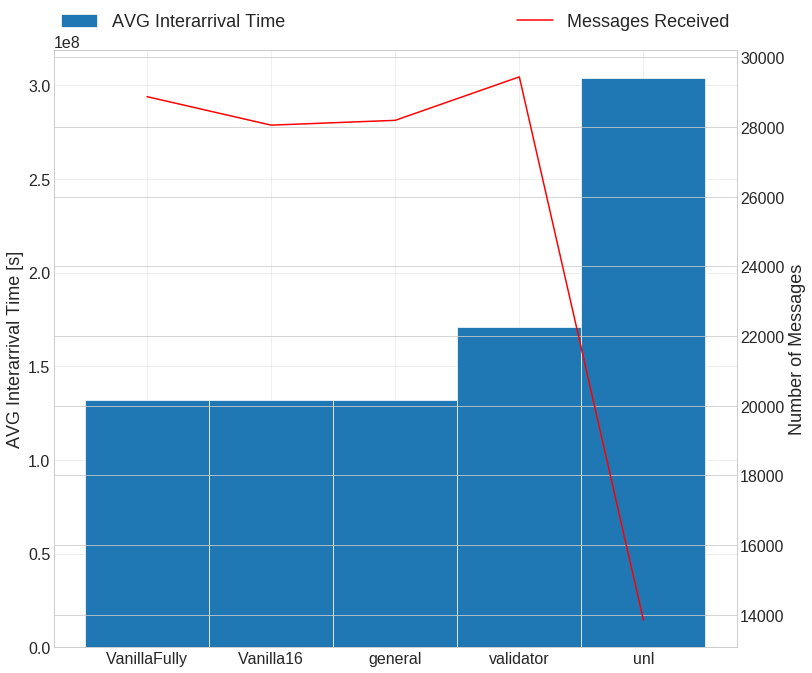

<Figure size 1440x1440 with 0 Axes>

In [67]:
# plot

 #Style configs
plt.style.use('seaborn-whitegrid')
plt.rc('xtick',labelsize=16)
plt.rc('ytick',labelsize=16)

fig, ax = plt.subplots(constrained_layout=False)
ax.grid(alpha=0.4)

fig.tight_layout()
fig.subplots_adjust(left=0.19, bottom=0.09, right=0.98, top=0.92, wspace=0.17, hspace=0.17)


l1 = ax.bar(avgDelta['type'], avgDelta['avg'], width=1, edgecolor="white", linewidth=0.7, label="AVG Interarrival Time")
ax2 = ax.twinx()
l2 = ax2.plot(avgDelta['type'], avgDelta['messages'], color="red", label="Messages Received")

ax.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower left',
                      ncol=1, mode="expand", borderaxespad=0.)
ax2.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower right',
                      ncol=1, borderaxespad=0.)

ax.set_ylabel('AVG Interarrival Time [s]')
ax2.set_ylabel('Number of Messages')

plt.rcParams.update({'font.size': 18})
plt.rcParams['figure.figsize'] = 12, 10

plt.figure(figsize=(20, 20))

#Draw and save
plt.show()
fig.savefig('/home/flav/gossip/gossip_data/figures/avgInterArrival.pdf', format='pdf', facecolor='white', edgecolor='none', bbox_inches='tight')
fig.savefig('/home/flav/gossip/gossip_data/figures/avgInterArrival.png', format='png', facecolor='white', edgecolor='none', bbox_inches='tight')
fig.clf()


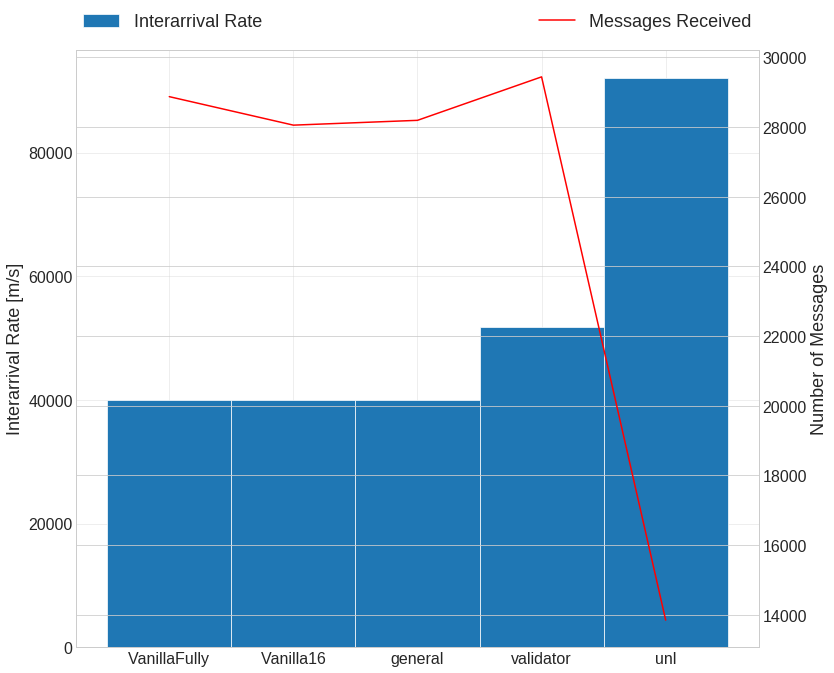

<Figure size 1440x1440 with 0 Axes>

In [68]:
# plot

 #Style configs
plt.style.use('seaborn-whitegrid')
plt.rc('xtick',labelsize=16)
plt.rc('ytick',labelsize=16)

fig, ax = plt.subplots(constrained_layout=False)
ax.grid(alpha=0.4)

fig.tight_layout()
fig.subplots_adjust(left=0.19, bottom=0.09, right=0.98, top=0.92, wspace=0.17, hspace=0.17)


l1 = ax.bar(avgDelta['type'], avgDelta['rate'], width=1, edgecolor="white", linewidth=0.7, label="Interarrival Rate")
ax2 = ax.twinx()
l2 = ax2.plot(avgDelta['type'], avgDelta['messages'], color="red", label="Messages Received")

ax.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower left',
                      ncol=1, mode="expand", borderaxespad=0.)
ax2.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower right',
                      ncol=1, borderaxespad=0.)

ax.set_ylabel('Interarrival Rate [m/s]')
ax2.set_ylabel('Number of Messages')

plt.rcParams.update({'font.size': 18})
plt.rcParams['figure.figsize'] = 12, 10

plt.figure(figsize=(20, 20))

#Draw and save
plt.show()
fig.savefig('/home/flav/gossip/gossip_data/figures/InterArrivalRate.pdf', format='pdf', facecolor='white', edgecolor='none', bbox_inches='tight')
fig.savefig('/home/flav/gossip/gossip_data/figures/InterArrivalRate.png', format='png', facecolor='white', edgecolor='none', bbox_inches='tight')
fig.clf()
